```
Alexander Baquiax
12007988
````


In [150]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display, Markdown
from fitter import Fitter
import random

# Ejercicio #2

La empresa ABC Corp. realiza publicidad de sus productos por medio de periódico, televisión y radio. Sin embargo, el gerente general cree que el presupuesto que se ha invertido hasta el momento  probablemente  no  ha  generado  los  beneficios  que  se desean,  por  tal  razón  le  ha  solicitado  a  una  compañía  de consultora  en  investigación  de  operaciones  especializada  en simulación  encontrar  la combinación  adecuada  de  presupuesto que se debe invertir para generar el mejor nivel de ventas.

Se le proporcionarán un conjunto de datos sobre las ventas, la inversión en televisión, radio y periódico deberá realizar los siguientes pasos para desarrollar este ejercicio:

In [151]:
data = pd.read_csv('ex2data.csv')
data.drop(['Unnamed: 0'], axis=1, inplace=True)
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [152]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


#### Regresión lineal
Desarrolle  un  modelo  de  regresión  lineal  usando  la variable `Sales` como variable explicada y `TV`, `Newspaper` y `Radio` como  variables  explicatorias  para  determinar  una expresión  matemática  que  permita  relacionar  los  tres valores tipos de inversión. 

<Axes: >

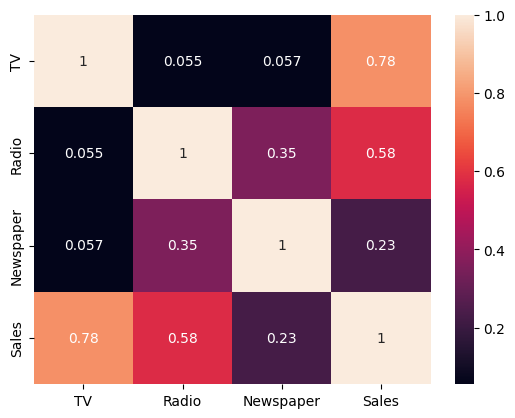

In [153]:
data_correlation = data.corr()

sns.heatmap(data_correlation, annot=True)

In [154]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [155]:
x = data[['TV', 'Radio', 'Newspaper']]

y = data['Sales']


## Preparing data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

## Training
lr = LinearRegression()
lr.fit(x_train, y_train)

## Testing
y_hat = lr.predict(x_test)

## Evaluation https://scikit-learn.org/stable/modules/model_evaluation.html#mean-squared-error
y_test = np.array(y_test)

mse = mean_squared_error(y_test, y_hat)

## Coeficietns and intercept
coeficients = lr.coef_
intercept = lr.intercept_


display(Markdown(f"Resultados:\nMSE: $${mse}$$\nCoeficientes: $${coeficients}$$\nIntercept: $${intercept}$$" ))

Resultados:
MSE: $$3.1740973539761033$$
Coeficientes: $$[0.04472952 0.18919505 0.00276111]$$
Intercept: $$2.979067338122629$$

In [156]:
display(Markdown(f"$$Sales = {coeficients[0]:.6f}*TV + {coeficients[1]:.6f}*Radio + {coeficients[2]:.6f}*Newspaper + {intercept:.6f}$$"))

def sales_function(tv, radio, newspaper):
    return coeficients[0]*tv + coeficients[1]*radio + coeficients[2]*newspaper + intercept


$$Sales = 0.044730*TV + 0.189195*Radio + 0.002761*Newspaper + 2.979067$$

#### Distribución de probabilidad

Determine la distribución de probabilidad de las variables TV, Radio y Periódico para generar números aleatorios para cada tipo de publicidad. Si no es posible asuma que la distribución es Triangular determinando el valor mínimo, máximo y más probable.

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
uniform,0.000589,1141.869085,1148.465720,inf,0.050396,0.670833
norm,0.000747,1177.189289,1183.785924,inf,0.087523,0.087920
expon,0.000858,1203.250188,1209.846823,inf,0.159986,0.000061


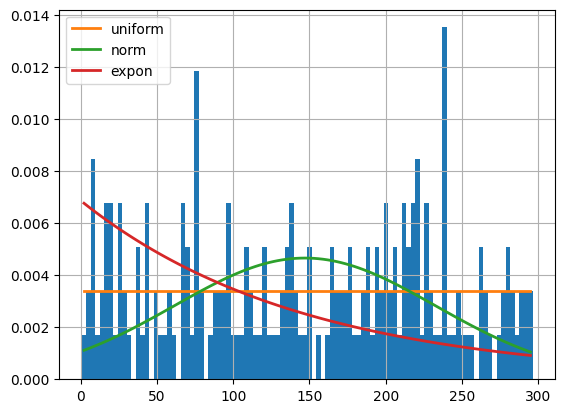

In [157]:
tv_fitter = Fitter(data['TV'], distributions=['norm', 'expon', 'uniform'])

tv_fitter.fit()
tv_fitter.summary()

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
uniform,0.016462,784.798167,791.394801,inf,0.068065,0.298636
expon,0.022675,846.586372,853.183007,inf,0.136710,0.001011
norm,0.023133,821.384223,827.980858,inf,0.084525,0.108325


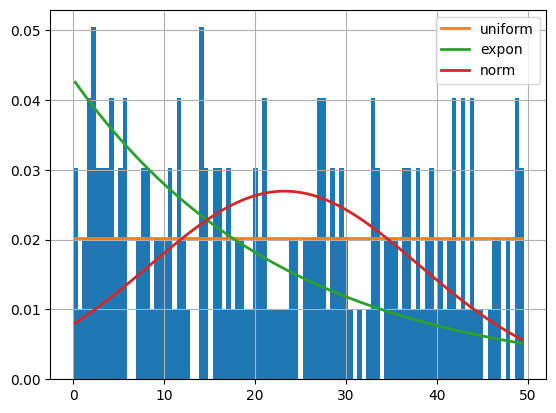

In [158]:
radio_fitter = Fitter(data['Radio'], distributions=['norm', 'expon', 'uniform'])

radio_fitter.fit()
radio_fitter.summary()

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
expon,0.005626,1061.743755,1068.340390,inf,0.121591,4.917691e-03
norm,0.005838,1181.604844,1188.201478,inf,0.098810,3.753841e-02
uniform,0.009747,950.712680,957.309315,inf,0.387982,1.294629e-27


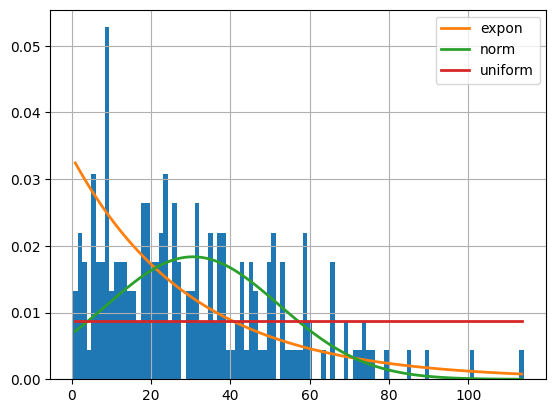

In [159]:
newspaper_fitter = Fitter(data['Newspaper'], distributions=['norm', 'expon', 'uniform'])

newspaper_fitter.fit()
newspaper_fitter.summary()

#### Simulación de Montecarlo

Realice  una  simulación  de  Montecarlo  que  le  permita determinar  en  la  mayoría  de  los  casos  cuales  son  los valores de inversión de cada tipo de publicidad maximizando el valor de ventas. 

In [176]:
def simulate(epochs=1000):
    tv_sampler = np.random.uniform(low= min(data['TV']), high=max(data['TV']), size=10000)
    radio_sampler = np.random.uniform(low= min(data['Radio']), high=max(data['Radio']), size=10000)
    newspaper_sampler = np.random.normal(loc= np.mean(data['Newspaper']), scale=np.std(data['Newspaper']), size=10000)

    sales_history = []
    tv_history = []
    radio_history = []
    newspaper_history = []
    

    for i in range(epochs):
        tv = random.choice(tv_sampler)
        radio = random.choice(radio_sampler)
        newspaper = random.choice(newspaper_sampler)
        sales = sales_function(tv, radio, newspaper) 
        
        sales_history.append(sales)
        tv_history.append(tv)
        radio_history.append(radio)
        newspaper_history.append(newspaper)
    
    return sales_history, tv_history, radio_history, newspaper_history

$$Mean(Sales) = 14.585592$$

$$Mean(TV) = 152.447805$$

$$Mean(Radio) = 24.872332$$

$$Mean(Newspaper) = 29.656933$$

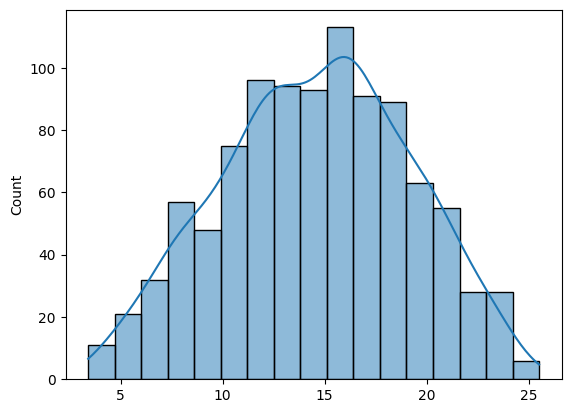

In [174]:
result = simulate(epochs=1000)

sns.histplot(result[0], kde=True)

display(Markdown(f"$$Mean(Sales) = {np.mean(result[0]):.6f}$$"))
display(Markdown(f"$$Mean(TV) = {np.mean(result[1]):.6f}$$"))
display(Markdown(f"$$Mean(Radio) = {np.mean(result[2]):.6f}$$"))
display(Markdown(f"$$Mean(Newspaper) = {np.mean(result[3]):.6f}$$"))

#### Presupuestos


Determine  el  valor  del  presupuesto  para  cada  tipo  de publicidad  normalizado  los  valores  y  proporcionando  un porcentaje.


In [187]:
total_budget = np.mean(result[1]) + np.mean(result[2]) + np.mean(result[3])

display(Markdown(f"$$Total Budget = {total_budget:.6f}$$"))
display(Markdown(f"$$TV: {(np.mean(result[1])/total_budget) * 100:.2f} \%$$"))
display(Markdown(f"$$Radio: {(np.mean(result[2])/total_budget) * 100:.2f} \%$$"))
display(Markdown(f"$$Newspaper: {(np.mean(result[3])/total_budget) * 100:.2f} \%$$"))

$$Total Budget = 206.977070$$

$$TV: 73.65 \%$$

$$Radio: 12.02 \%$$

$$Newspaper: 14.33 \%$$